In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('osi.csv')

In [29]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Month'] = le.fit_transform(df['Month'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])

In [31]:
mat = df.corr()
mat

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
Month                          0.048560                 0.029061   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561                -0.014376   
VisitorType                   -0.025820                -0.023940   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                  -0.116114               -0.074067   
ExitRates                    -0.163666               -0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                   -0.048219               -0.030577   
Month                         0.019743                0.005987   
OperatingSystems             -0.009527               -0.009579   
Browser                      -0.038235               -0.019285   
Region                       -0.029169               -0.027144   
TrafficType                  -0.034491               -0.024675   
VisitorType                   0.055828                0.044677   
Weekend                       0.035785                0.024078   
Revenue                       0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939    -0.223563   
Administrative_Duration        0.289087                 0.355422    -0.144170   
Informational                  0.374164                 0.387505    -0.116114   
Informational_Duration         0.280046                 0.347364    -0.074067   
ProductRelated                 1.000000                 0.860927    -0.204578   
ProductRelated_Duration        0.860927                 1.000000    -0.184541   
BounceRates                   -0.204578                -0.184541     1.000000   
ExitRates                     -0.292526                -0.251984     0.913004   
PageValues                     0.056282                 0.052823    -0.119386   
SpecialDay                    -0.023958                -0.036380     0.072702   
Month                          0.070299                 0.061186    -0.023763   
OperatingSystems               0.004290                 0.002976     0.023823   
Browser                       -0.013146                -0.007380    -0.015772   
Region                        -0.038122                -0.033091    -0.006485   
TrafficType                   -0.043064                -0.036377     0.078286   
VisitorType                    0.126656                 0.119329     0.135536   
Weekend                        0.016092                 0.007311    -0.046514   
Revenue            

In [32]:
df['ProductRel_per_dur'] = df['ProductRelated']/(df['ProductRelated_Duration']+0.00001)
df['Admin_per_dur'] = df['Administrative']/(df['Administrative_Duration']+0.00001)
df['Inform_per_dur'] = df['Informational']/(df['Informational_Duration']+0.00001)
df['Bounce_by_exit'] = df['BounceRates']/(df['ExitRates']+0.00001)

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Month'] = le.fit_transform(df['Month'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])

X1 = df[['ProductRel_per_dur','Admin_per_dur','Inform_per_dur','Bounce_by_exit','PageValues','Month']]
y1 = df['Revenue']

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_sample(X1,y1)

In [35]:
import numpy as np
A = np.std(X_res)
list(A)
B = np.mean(X_res)
list(B)

[5218.859029205611,
 1387.9485510837133,
 2194.767099990961,
 0.24628551609082644,
 14.984616045190817,
 5.289006914520493]

<IPython.core.display.Javascript object>


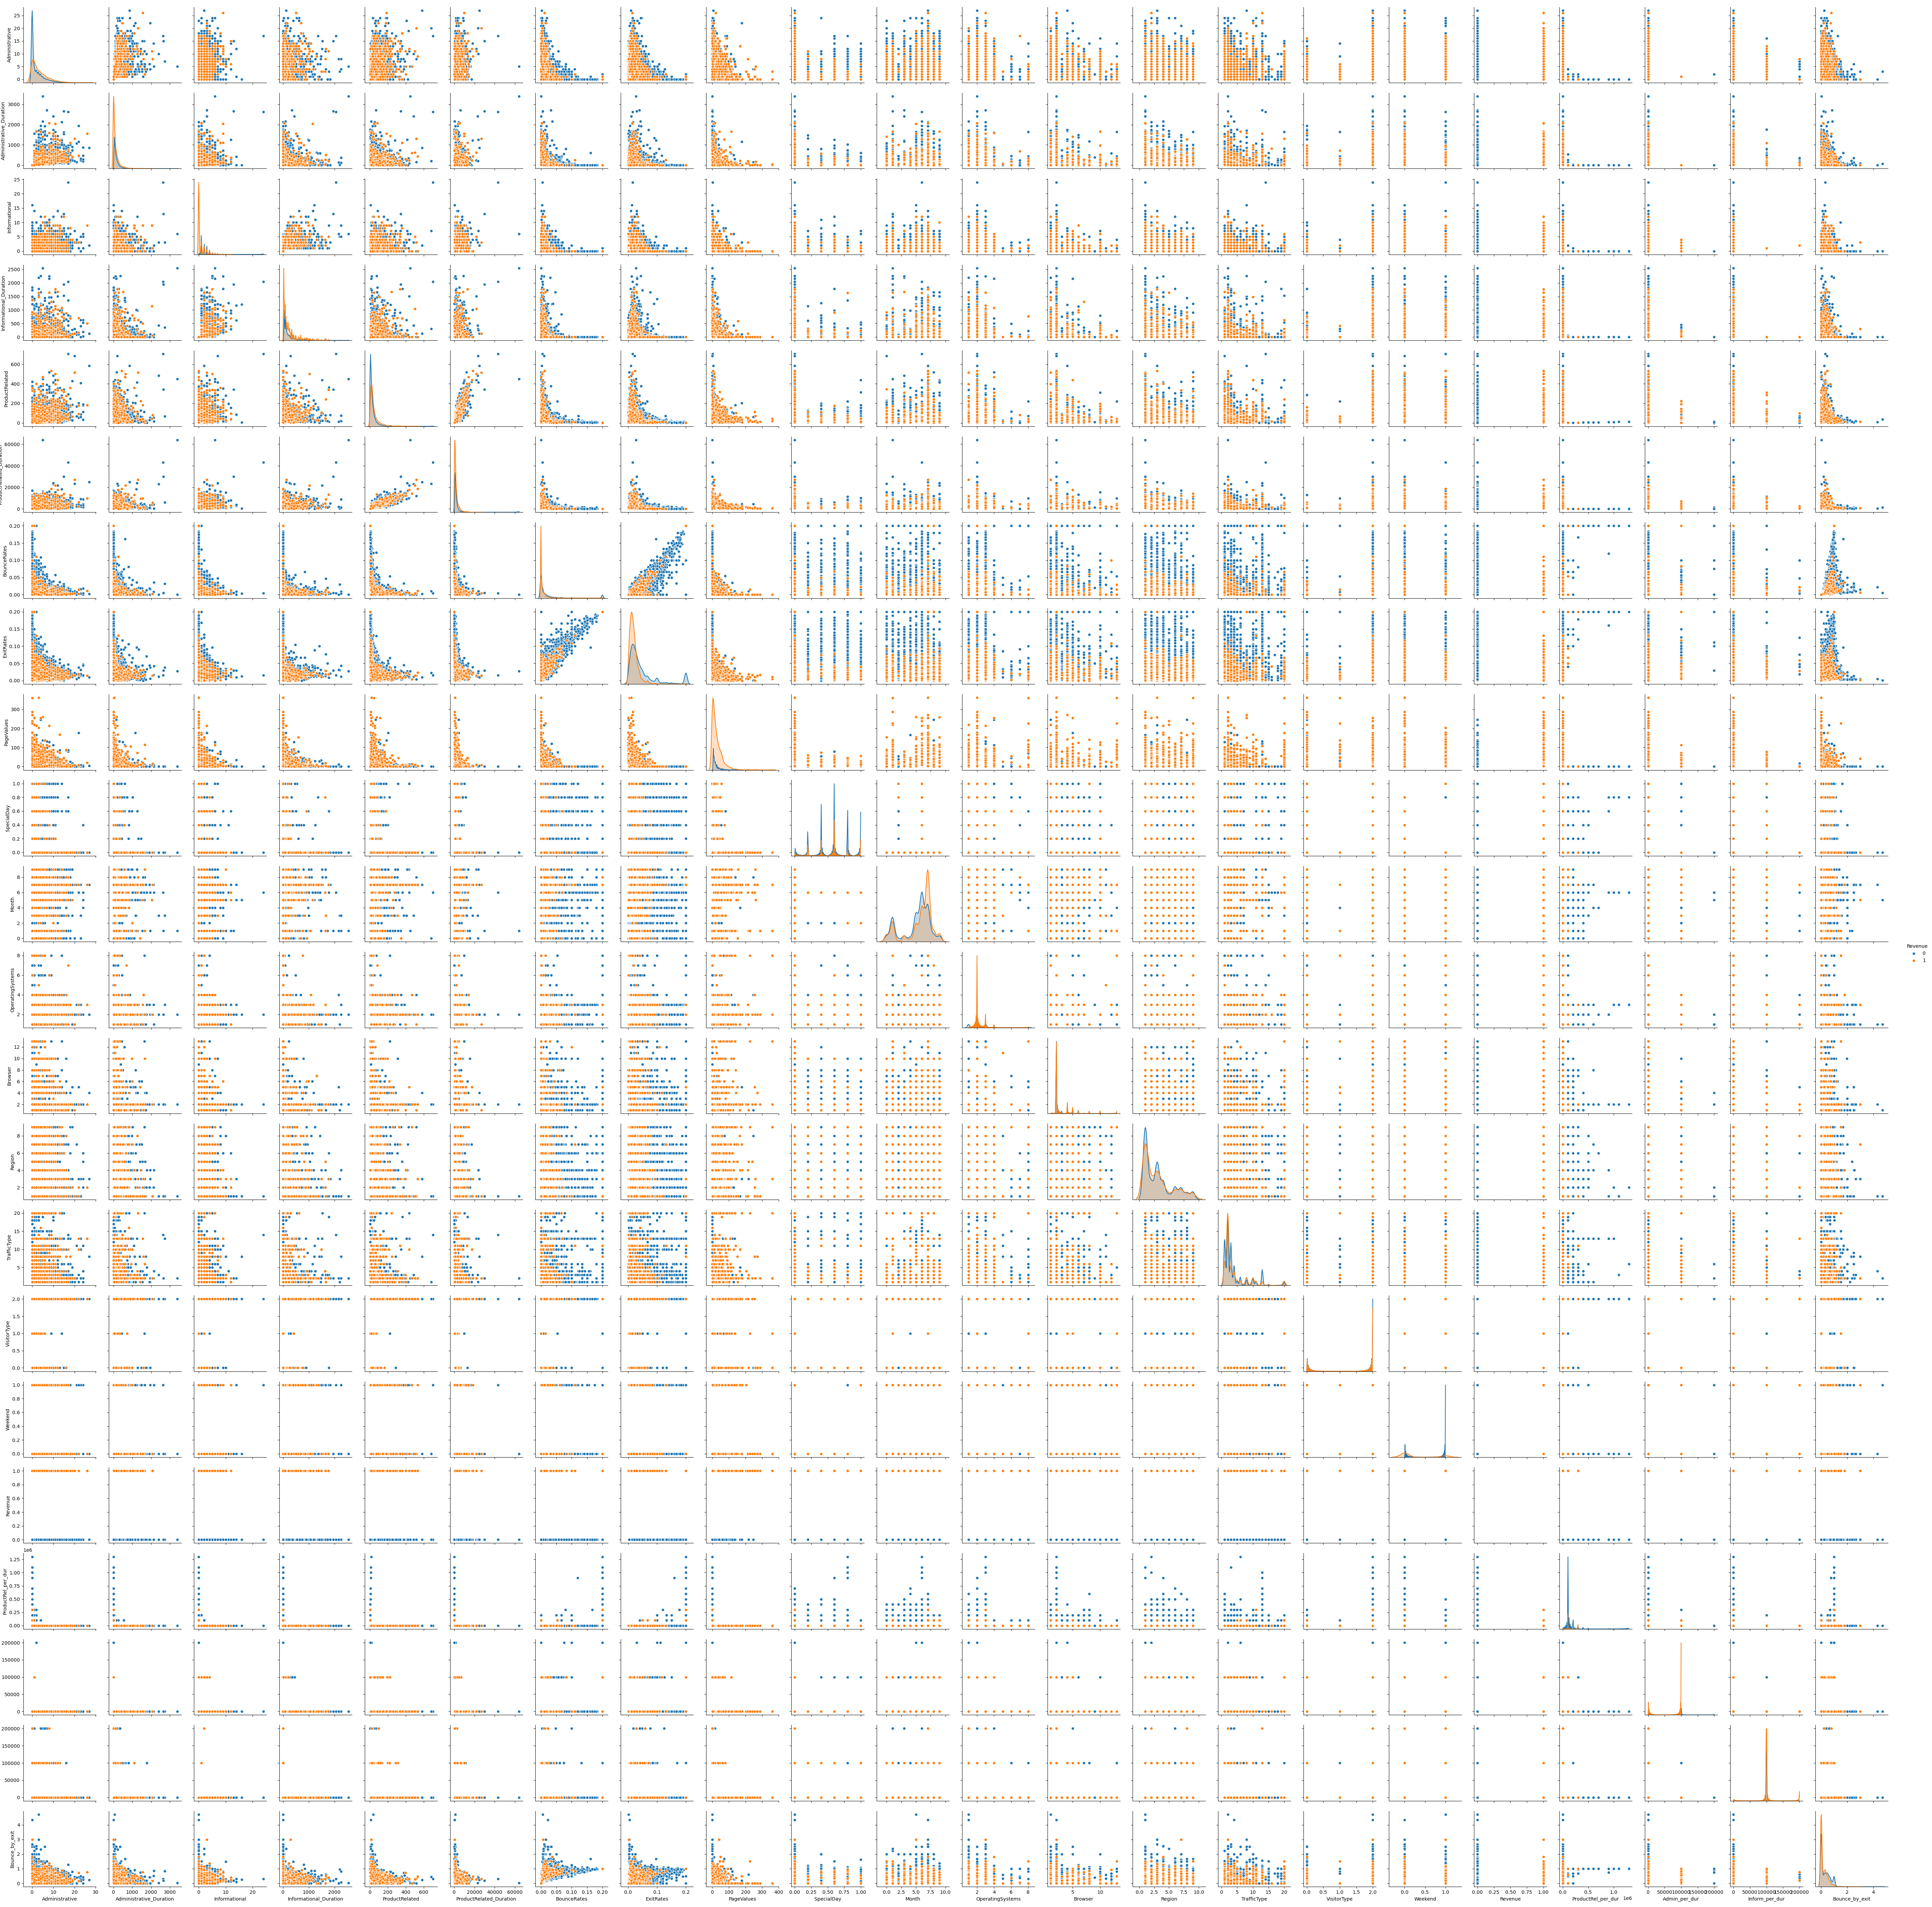

/home/navaneeth/anaconda3/envs/VIAI/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/navaneeth/anaconda3/envs/VIAI/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/navaneeth/anaconda3/envs/VIAI/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/navaneeth/anaconda3/envs/VIAI/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [37]:
import seaborn as sns

sns.pairplot(df,hue='Revenue')

[0.16487247 0.12581571 0.07112539 0.10864301 0.47650569 0.05303773]


<IPython.core.display.Javascript object>


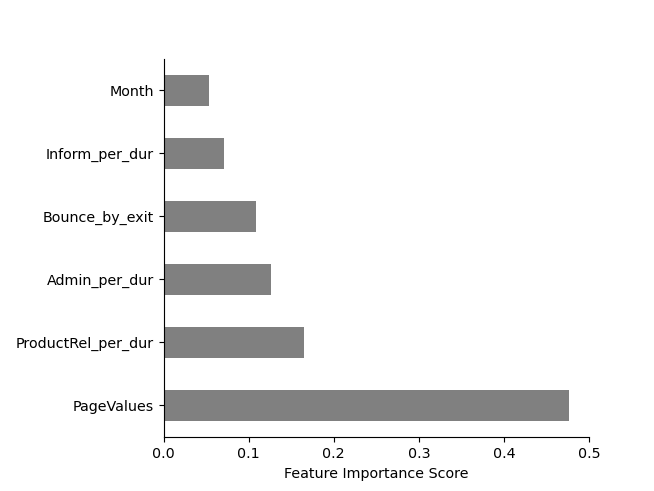

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

X1 = df[['ProductRel_per_dur','Admin_per_dur','Inform_per_dur','Bounce_by_exit','PageValues','Month']]
y1 = df['Revenue']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
ax = feat_importances.nlargest(10).plot(kind='barh',color='grey')
plt.xlabel('Feature Importance Score')
plt.subplots_adjust(left=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

                Specs         Score
0  ProductRel_per_dur  1.649523e+07
1       Admin_per_dur  8.581059e+05
2      Inform_per_dur  6.048444e+05
4          PageValues  1.751268e+05
5               Month  8.616370e+01
3      Bounce_by_exit  8.446024e+01


<IPython.core.display.Javascript object>


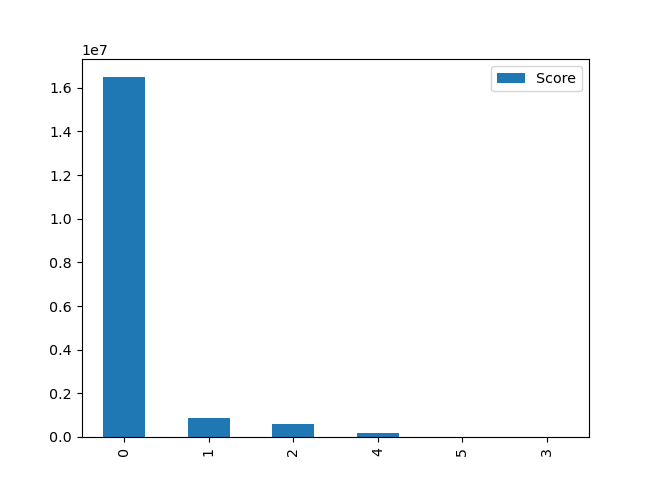

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X1 = df[['ProductRel_per_dur','Admin_per_dur','Inform_per_dur','Bounce_by_exit','PageValues','Month']]
y1 = df['Revenue']

bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X1,df['Revenue'])

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

featureScores
print(featureScores.nlargest(10,'Score'))
featureScores.nlargest(10,'Score').plot(kind='bar')

In [41]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_res)
X1 = scaler.transform(X_res)

from sklearn.model_selection import train_test_split
X1,x2,y1,Y2 = train_test_split(X_res,y_res,test_size=0.25)

from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
train = []
val = []
train_f1_score = []
val_f1_score = []
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
    neigh.fit(X1, y1)
    train.append(neigh.score(X1,y1))
    val.append(neigh.score(x2,Y2))
    train_f1_score.append(f1_score(y1,neigh.predict(X1)))
    val_f1_score.append(f1_score(Y2,neigh.predict(x2)))


<IPython.core.display.Javascript object>


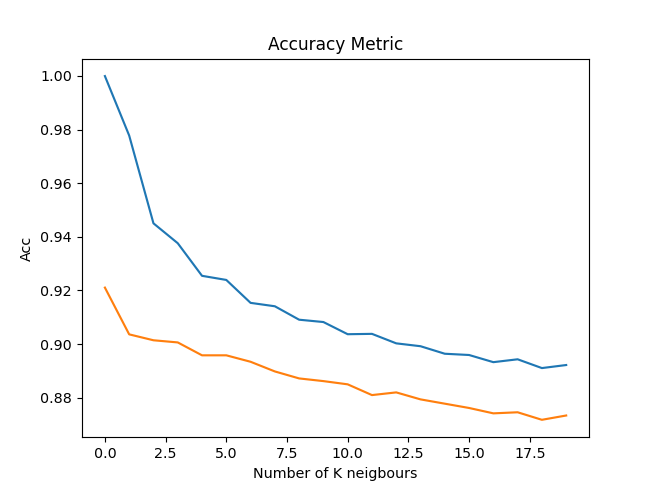

<IPython.core.display.Javascript object>


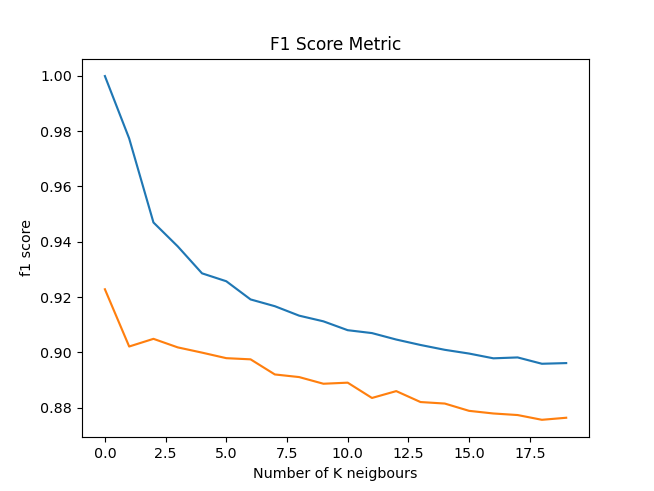

In [43]:
plt.figure()
plt.title('Accuracy Metric')
plt.ylabel('Acc')
plt.xlabel('Number of K neigbours')
plt.plot(train)
plt.plot(val)
plt.figure()
plt.title('F1 Score Metric')
plt.ylabel('f1 score')
plt.xlabel('Number of K neigbours')
plt.plot(train_f1_score)
plt.plot(val_f1_score)

In [44]:
import pickle
neigh = KNeighborsClassifier(n_neighbors=1,algorithm='kd_tree',weights='distance')
neigh.fit(X1,y1)
neigh.score(X1,y1)
knnPickle = open('osi_knn', 'wb') 
pickle.dump(neigh, knnPickle)